# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19568287,
            "id": 1,
            "last_updated": 1702426493,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 809413454893,
                    "percent_change_1h": 0.181471303470864,
                    "percent_change_24h": 0.433802594316661,
                    "percent_change_7d": -6.21378589724245,
                    "percentage_change_1h": 0.181471303470864,
                    "percentage_change_24h": 0.433802594316661,
                    "percentage_change_7d": -6.21378589724245,
                    "price": 41365.0,
                    "volume_24h": 21630241873
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19568287,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 120214009,
            "id": 1027,
            "last_updated": 1702426485,
            "max_supply": 120214009,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 264547576570,
                    "percent_change_1h": 0.390849766003982,
                    "percent_change_24h": -1.00430814316476,
                    "percent_change_7d": -4.07611341406932,
                    "percentage_change_1h": 0.390849766003982,
                    "percentage_change_24h": -1.00430814316476,
                    "percentage_change_7d": -4.07611341406932,
                    "price": 2200.59,
                    "volume_24h": 13449453000
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120214009,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cr

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f'The current price of BitCoin is ${btc_price}.')

The current price of BitCoin is $41365.0.


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f'The current price of Ethereum is ${eth_price}.')

The current price of Ethereum is $2200.59.


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f'The current value of your BTC holdings is ${btc_value:.2f}.')

The current value of your BTC holdings is $49638.00.


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f'The current value of your ETH holdings is ${eth_value:.2f}.')

The current value of your ETH holdings is $11663.13.


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f'The total value of all of your cryptocurrency holdings is ${total_crypto_wallet:.2f}.')

The total value of all of your cryptocurrency holdings is $61301.13.


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('APCA_API_KEY_ID')
alpaca_secret_key = os.getenv('APCA_API_SECRET_KEY')

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1Day
timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp('2023-12-11', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-12-11', tz='America/New_York').isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_bars(
    tickers, 
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY, AGG], axis=1, keys=['SPY', 'AGG'])

# Review the first 5 rows of the Alpaca DataFrame
display(prices_df.head())
display(prices_df.tail())

SPY                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2023-12-11 05:00:00+00:00  461.99  462.17  459.47      460590  459.69   

                                                  AGG               \
                             volume        vwap close   high   low   
timestamp                                                            
2023-12-11 05:00:00+00:00  64934025  460.922403  96.9  96.95  96.6   

                                                                  
                          trade_count  open    volume       vwap  
timestamp                                                         
2023-12-11 05:00:00+00:00       40934  96.8  15008723  96.808225

SPY                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2023-12-11 05:00:00+00:00  461.99  462.17  459.47      460590  459.69   

                                                  AGG               \
                             volume        vwap close   high   low   
timestamp                                                            
2023-12-11 05:00:00+00:00  64934025  460.922403  96.9  96.95  96.6   

                                                                  
                          trade_count  open    volume       vwap  
timestamp                                                         
2023-12-11 05:00:00+00:00       40934  96.8  15008723  96.808225

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df['AGG']['close'])

# Print the AGG closing price
print(f'The closing price for AGG is ${agg_close_price:.2f}.')

The closing price for AGG is $96.90.


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df['SPY']['close'])

# Print the SPY closing price
print(f'The closing price for SPY is ${spy_close_price:.2f}.')

The closing price for SPY is $461.99.


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f'The current value of the bond portfolio is ${agg_value:.2f}.')

The current value of the bond portfolio is $19380.00.


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(f'The total value of the stock portfolio is ${spy_value:.2f}.')

The total value of the stock portfolio is $50818.90.


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
print(f'The combined value of the stock and bond portfolio is ${total_stocks_bonds:.2f}.')

The combined value of the stock and bond portfolio is $70198.90.


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
print(f'The value of the entire portfolio - comprised of crytocurrencies, stocks, and bonds -'
      f' is ${total_portfolio:.2f}.')

The value of the entire portfolio - comprised of crytocurrencies, stocks, and bonds - is $131500.03.


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data    

[61301.127, 70198.9]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    savings_data,
    columns=['Amount'],
    index=['Crypto', 'Stock/Bond']
)

# Display the savings_df DataFrame
savings_df

,Amount
Crypto,61301.127
Stock/Bond,70198.900


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Pie Chart'}, ylabel='Amount'>

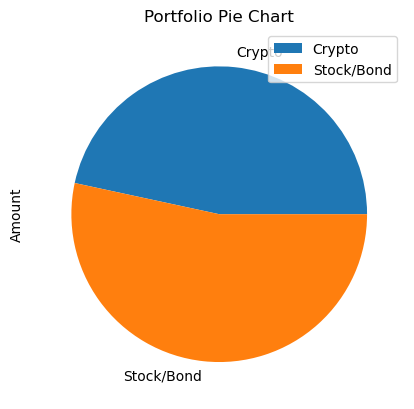

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='Amount', title='Portfolio Pie Chart')

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income

# Review the results
emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio >= emergency_fund_value:
    print('Congratulations, you have the adequate revenue amount within this fund!')
elif total_portfolio == emergency_fund_value:
    print('Congratulations, you are at a breakeven point, therefore, you have the adequate revenue amount within this fund!')
else:
    print(f'Unfortunately, you do not have the adequate funds at this time. You are currently ${total_portfolio:.2f - emergency_fund_value:.2f} way from your goal.')

Congratulations, you have the adequate revenue amount within this fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
MC_start_date = pd.Timestamp('2020-12-11', tz='America/New_York').isoformat()
MC_end_date = pd.Timestamp('2023-12-11', tz='America/New_York').isoformat()

In [29]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
MC_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=MC_start_date,
    end=MC_end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = MC_df[MC_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = MC_df[MC_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
MC_df = pd.concat([SPY, AGG], axis=1, keys=['SPY', 'AGG'])


# Display both the first and last five rows of the DataFrame
display(MC_df.head())
display(MC_df.tail())

SPY                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2020-12-11 05:00:00+00:00  366.14  366.7402  363.2600      305545  364.90   
2020-12-14 05:00:00+00:00  364.90  369.8000  364.4700      353011  368.64   
2020-12-15 05:00:00+00:00  369.56  369.5900  365.9200      285594  367.40   
2020-12-16 05:00:00+00:00  370.06  371.1600  368.8676      289564  369.82   
2020-12-17 05:00:00+00:00  372.19  372.4600  371.0500      264948  371.94   

                                                    AGG                     \
                             volume        vwap   close     high       low   
timestamp                                                                    
2020-12-11 05:00:00+00:00  58659075  365.476504  118.03  118.090  117.9500   
2020-12-14 05:00:00+00:00  70722353  366.553861  117.96  118.025  117.7969   
2020-12-15 05:00:00+00:00  65591667  367.880381  118.03  118.030  117.9000   
2020-12-16 05:00:00+00:00  59534034  369.945485  117.98  118.033  117.7610   
2020-12-17 05:00:00+00:00  66592842  371.612642  117.85  118.060  117.7299   

                                                                    
                          trade_count    open   volume        vwap  
timestamp                                                           
2020-12-11 05:00:00+00:00       26054  118.01  5755499  118.017461  
2020-12-14 05:00:00+00:00       11800  117.86  6325304  117.950273  
2020-12-15 05:00:00+00:00       16067  117.95  4647760  117.975184  
2020-12-16 05:00:00+00:00       17218  117.83  4640620  117.930225  
2020-12-17 05:00:00+00:00       24629  118.01  6989164  117.867602

SPY                                       \
                            close     high     low trade_count    open   
timestamp                                                                
2023-12-05 05:00:00+00:00  456.60  457.590  454.87      483242  455.26   
2023-12-06 05:00:00+00:00  454.76  458.840  454.31      465901  458.81   
2023-12-07 05:00:00+00:00  458.23  458.900  456.29      458079  456.91   
2023-12-08 05:00:00+00:00  460.20  460.745  457.21      524786  457.46   
2023-12-11 05:00:00+00:00  461.99  462.170  459.47      460590  459.69   

                                                   AGG                   \
                             volume        vwap  close    high      low   
timestamp                                                                 
2023-12-05 05:00:00+00:00  69793569  456.319673  97.10  97.145  96.7850   
2023-12-06 05:00:00+00:00  69124885  456.130868  97.35  97.490  97.1500   
2023-12-07 05:00:00+00:00  67002346  457.663703  97.38  97.560  97.2200   
2023-12-08 05:00:00+00:00  83124965  459.278999  96.89  97.065  96.7217   
2023-12-11 05:00:00+00:00  64934025  460.922403  96.90  96.950  96.6000   

                                                                   
                          trade_count   open    volume       vwap  
timestamp                                                          
2023-12-05 05:00:00+00:00       32726  96.85   8850641  97.045567  
2023-12-06 05:00:00+00:00       31593  97.24  11111225  97.379466  
2023-12-07 05:00:00+00:00       26731  97.22   7157947  97.396928  
2023-12-08 05:00:00+00:00       24997  96.99   6696783  96.893926  
2023-12-11 05:00:00+00:00       40934  96.80  15008723  96.808225

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_30_df = MCSimulation(
    portfolio_data=MC_df,
    weights=[.6, .4],
    num_simulation=500,
    num_trading_days=252*30
)

# Review the simulation input data
display(MC_30_df.portfolio_data.head())
display(MC_30_df.portfolio_data.tail())

SPY                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2020-12-11 05:00:00+00:00  366.14  366.7402  363.2600      305545  364.90   
2020-12-14 05:00:00+00:00  364.90  369.8000  364.4700      353011  368.64   
2020-12-15 05:00:00+00:00  369.56  369.5900  365.9200      285594  367.40   
2020-12-16 05:00:00+00:00  370.06  371.1600  368.8676      289564  369.82   
2020-12-17 05:00:00+00:00  372.19  372.4600  371.0500      264948  371.94   

                                                                 AGG           \
                             volume        vwap daily_return   close     high   
timestamp                                                                       
2020-12-11 05:00:00+00:00  58659075  365.476504          NaN  118.03  118.090   
2020-12-14 05:00:00+00:00  70722353  366.553861    -0.003387  117.96  118.025   
2020-12-15 05:00:00+00:00  65591667  367.880381     0.012771  118.03  118.030   
2020-12-16 05:00:00+00:00  59534034  369.945485     0.001353  117.98  118.033   
2020-12-17 05:00:00+00:00  66592842  371.612642     0.005756  117.85  118.060   

                                                                              \
                                low trade_count    open   volume        vwap   
timestamp                                                                      
2020-12-11 05:00:00+00:00  117.9500       26054  118.01  5755499  118.017461   
2020-12-14 05:00:00+00:00  117.7969       11800  117.86  6325304  117.950273   
2020-12-15 05:00:00+00:00  117.9000       16067  117.95  4647760  117.975184   
2020-12-16 05:00:00+00:00  117.7610       17218  117.83  4640620  117.930225   
2020-12-17 05:00:00+00:00  117.7299       24629  118.01  6989164  117.867602   

                                        
                          daily_return  
timestamp                               
2020-12-11 05:00:00+00:00          NaN  
2020-12-14 05:00:00+00:00    -0.000593  
2020-12-15 05:00:00+00:00     0.000593  
2020-12-16 05:00:00+00:00    -0.000424  
2020-12-17 05:00:00+00:00    -0.001102

SPY                                       \
                            close     high     low trade_count    open   
timestamp                                                                
2023-12-05 05:00:00+00:00  456.60  457.590  454.87      483242  455.26   
2023-12-06 05:00:00+00:00  454.76  458.840  454.31      465901  458.81   
2023-12-07 05:00:00+00:00  458.23  458.900  456.29      458079  456.91   
2023-12-08 05:00:00+00:00  460.20  460.745  457.21      524786  457.46   
2023-12-11 05:00:00+00:00  461.99  462.170  459.47      460590  459.69   

                                                                AGG          \
                             volume        vwap daily_return  close    high   
timestamp                                                                     
2023-12-05 05:00:00+00:00  69793569  456.319673    -0.000197  97.10  97.145   
2023-12-06 05:00:00+00:00  69124885  456.130868    -0.004030  97.35  97.490   
2023-12-07 05:00:00+00:00  67002346  457.663703     0.007630  97.38  97.560   
2023-12-08 05:00:00+00:00  83124965  459.278999     0.004299  96.89  97.065   
2023-12-11 05:00:00+00:00  64934025  460.922403     0.003890  96.90  96.950   

                                                                            \
                               low trade_count   open    volume       vwap   
timestamp                                                                    
2023-12-05 05:00:00+00:00  96.7850       32726  96.85   8850641  97.045567   
2023-12-06 05:00:00+00:00  97.1500       31593  97.24  11111225  97.379466   
2023-12-07 05:00:00+00:00  97.2200       26731  97.22   7157947  97.396928   
2023-12-08 05:00:00+00:00  96.7217       24997  96.99   6696783  96.893926   
2023-12-11 05:00:00+00:00  96.6000       40934  96.80  15008723  96.808225   

                                        
                          daily_return  
timestamp                               
2023-12-05 05:00:00+00:00     0.006635  
2023-12-06 05:00:00+00:00     0.002575  
2023-12-07 05:00:00+00:00     0.000308  
2023-12-08 05:00:00+00:00    -0.005032  
2023-12-11 05:00:00+00:00     0.000103

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_df.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 110.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 120.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 130.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 140.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 150.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 160.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 170.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 180.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 190.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 200.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 210.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 220.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 230.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 240.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 250.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 260.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 270.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 280.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 290.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 300.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 310.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 320.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 330.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 340.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 350.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 360.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 370.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 380.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 390.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 400.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 410.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 420.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 430.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 440.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 450.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 460.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 470.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 480.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 490.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986684,1.003822,0.993403,1.010626,1.013533,0.996209,1.007015,0.993543,1.003072,1.014845,...,0.997080,1.001549,1.009272,1.008673,0.996434,0.983351,0.994833,1.005837,1.000899,1.004192
2,0.983036,1.005351,0.993855,1.009469,1.002036,0.993797,1.008286,0.993572,0.994779,1.024767,...,1.005893,1.008198,1.003499,0.996018,0.999809,0.981601,0.989186,1.003139,1.007968,0.999701
3,0.984259,1.006085,0.989553,1.000198,0.998269,0.999064,1.009785,0.996492,0.997787,1.032684,...,1.011506,1.005445,0.989045,0.995663,0.991718,0.978180,0.992464,0.996270,1.017938,1.013015
4,0.988822,1.012149,0.988238,0.994361,1.000541,1.007768,1.007710,0.999880,0.995227,1.031993,...,1.028227,0.999381,0.974765,0.993988,0.987435,0.974429,0.990434,0.995700,1.011600,1.010375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.770335,1.346524,5.008317,2.479488,1.510104,4.715275,4.172713,0.931471,1.688931,1.970502,...,1.646009,0.946753,1.386953,3.878195,1.579540,1.672323,1.974783,2.383941,0.782916,2.660075
7557,0.767291,1.353247,4.982081,2.498417,1.515528,4.750801,4.208103,0.939318,1.678011,1.951431,...,1.638455,0.935022,1.384845,3.832387,1.573005,1.638262,1.968187,2.392826,0.774716,2.644121
7558,0.786064,1.353081,4.964675,2.478648,1.532824,4.760451,4.231478,0.930780,1.673055,1.955555,...,1.644743,0.930159,1.387076,3.823749,1.563744,1.644979,1.975900,2.383682,0.778378,2.648258
7559,0.794275,1.344220,4.967794,2.450519,1.537236,4.706955,4.216300,0.942940,1.678873,1.941520,...,1.613531,0.932369,1.385749,3.802517,1.567893,1.628452,1.972342,2.374125,0.774343,2.658932


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

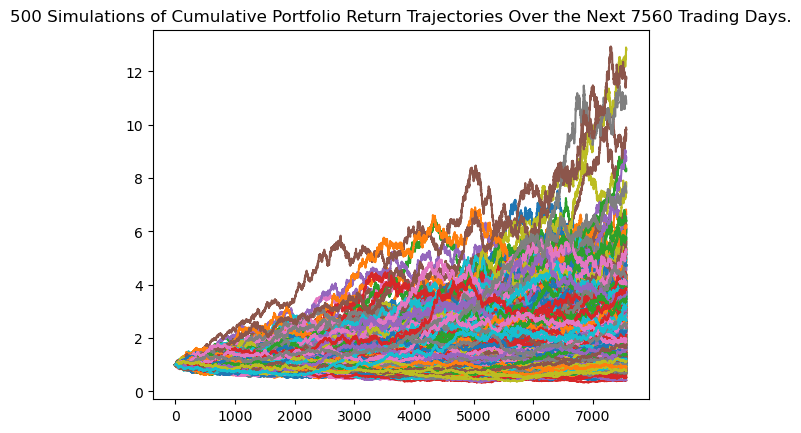

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_30_df.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

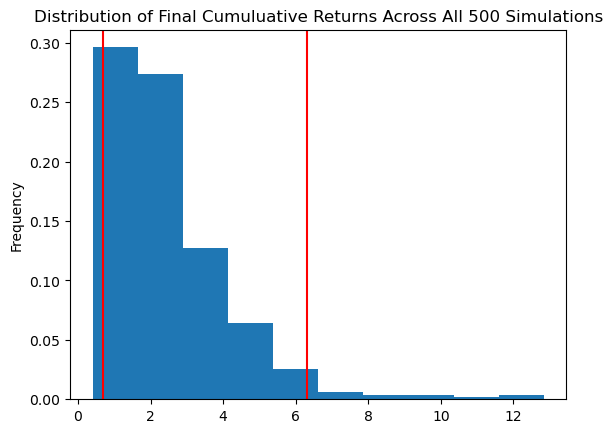

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_30_df.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_30_df_stats = MC_30_df.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
MC_30_df_stats

C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              2.484186
std               1.667717
min               0.409919
25%               1.343166
50%               2.003125
75%               3.149374
max              12.833861
95% CI Lower      0.698417
95% CI Upper      6.312386
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
print(total_stocks_bonds)

70198.9


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_30_df_stats[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_30_df_stats[9] * total_stocks_bonds

# Print the result of your calculations
print(f'With your portfolio, valued at ${total_stocks_bonds:.2f}, as your initial investment,'
      f' the lower bound projected return for your portfolio is ${ci_lower_thirty_cumulative_return:.2f}'
      f' and the upper bound projected return for your portfolio is ${ci_upper_thirty_cumulative_return:.2f}.')

With your portfolio, valued at $70198.90, as your initial investment, the lower bound projected return for your portfolio is $49028.09 and the upper bound projected return for your portfolio is $443122.57.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_10_df = MCSimulation(
    portfolio_data=MC_df,
    weights=[.8, .2],
    num_simulation=500,
    num_trading_days=252*10
)    

# Review the simulation input data
display(MC_10_df.portfolio_data.head())
display(MC_10_df.portfolio_data.tail())

SPY                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2020-12-11 05:00:00+00:00  366.14  366.7402  363.2600      305545  364.90   
2020-12-14 05:00:00+00:00  364.90  369.8000  364.4700      353011  368.64   
2020-12-15 05:00:00+00:00  369.56  369.5900  365.9200      285594  367.40   
2020-12-16 05:00:00+00:00  370.06  371.1600  368.8676      289564  369.82   
2020-12-17 05:00:00+00:00  372.19  372.4600  371.0500      264948  371.94   

                                                                 AGG           \
                             volume        vwap daily_return   close     high   
timestamp                                                                       
2020-12-11 05:00:00+00:00  58659075  365.476504          NaN  118.03  118.090   
2020-12-14 05:00:00+00:00  70722353  366.553861    -0.003387  117.96  118.025   
2020-12-15 05:00:00+00:00  65591667  367.880381     0.012771  118.03  118.030   
2020-12-16 05:00:00+00:00  59534034  369.945485     0.001353  117.98  118.033   
2020-12-17 05:00:00+00:00  66592842  371.612642     0.005756  117.85  118.060   

                                                                              \
                                low trade_count    open   volume        vwap   
timestamp                                                                      
2020-12-11 05:00:00+00:00  117.9500       26054  118.01  5755499  118.017461   
2020-12-14 05:00:00+00:00  117.7969       11800  117.86  6325304  117.950273   
2020-12-15 05:00:00+00:00  117.9000       16067  117.95  4647760  117.975184   
2020-12-16 05:00:00+00:00  117.7610       17218  117.83  4640620  117.930225   
2020-12-17 05:00:00+00:00  117.7299       24629  118.01  6989164  117.867602   

                                        
                          daily_return  
timestamp                               
2020-12-11 05:00:00+00:00          NaN  
2020-12-14 05:00:00+00:00    -0.000593  
2020-12-15 05:00:00+00:00     0.000593  
2020-12-16 05:00:00+00:00    -0.000424  
2020-12-17 05:00:00+00:00    -0.001102

SPY                                       \
                            close     high     low trade_count    open   
timestamp                                                                
2023-12-05 05:00:00+00:00  456.60  457.590  454.87      483242  455.26   
2023-12-06 05:00:00+00:00  454.76  458.840  454.31      465901  458.81   
2023-12-07 05:00:00+00:00  458.23  458.900  456.29      458079  456.91   
2023-12-08 05:00:00+00:00  460.20  460.745  457.21      524786  457.46   
2023-12-11 05:00:00+00:00  461.99  462.170  459.47      460590  459.69   

                                                                AGG          \
                             volume        vwap daily_return  close    high   
timestamp                                                                     
2023-12-05 05:00:00+00:00  69793569  456.319673    -0.000197  97.10  97.145   
2023-12-06 05:00:00+00:00  69124885  456.130868    -0.004030  97.35  97.490   
2023-12-07 05:00:00+00:00  67002346  457.663703     0.007630  97.38  97.560   
2023-12-08 05:00:00+00:00  83124965  459.278999     0.004299  96.89  97.065   
2023-12-11 05:00:00+00:00  64934025  460.922403     0.003890  96.90  96.950   

                                                                            \
                               low trade_count   open    volume       vwap   
timestamp                                                                    
2023-12-05 05:00:00+00:00  96.7850       32726  96.85   8850641  97.045567   
2023-12-06 05:00:00+00:00  97.1500       31593  97.24  11111225  97.379466   
2023-12-07 05:00:00+00:00  97.2200       26731  97.22   7157947  97.396928   
2023-12-08 05:00:00+00:00  96.7217       24997  96.99   6696783  96.893926   
2023-12-11 05:00:00+00:00  96.6000       40934  96.80  15008723  96.808225   

                                        
                          daily_return  
timestamp                               
2023-12-05 05:00:00+00:00     0.006635  
2023-12-06 05:00:00+00:00     0.002575  
2023-12-07 05:00:00+00:00     0.000308  
2023-12-08 05:00:00+00:00    -0.005032  
2023-12-11 05:00:00+00:00     0.000103

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_df.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 110.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 120.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 130.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 140.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 150.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 160.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 170.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 180.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 190.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 200.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 210.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 220.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 230.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 240.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 250.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 260.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 270.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 280.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 290.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 300.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 310.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 320.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 330.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 340.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 350.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 360.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 370.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 380.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 390.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 400.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 410.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 420.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 430.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 440.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 450.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 460.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 470.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 480.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

Running Monte Carlo simulation number 490.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFO

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993319,0.999050,0.997123,0.993704,0.998150,1.008141,1.001728,1.014646,0.984537,1.011958,...,1.009029,1.012066,0.995389,0.996996,0.995181,1.005504,0.982406,0.995417,0.997860,1.007524
2,0.987969,0.971663,0.990621,1.000527,0.992212,1.013540,1.001700,1.032615,0.982237,1.019577,...,0.995802,1.016981,1.004798,0.994481,0.989080,1.014136,0.996854,0.997321,0.995542,1.011963
3,0.986740,0.971945,0.988308,0.990459,0.992819,1.015515,1.009136,1.028617,0.994540,1.018246,...,0.989849,1.016692,1.005531,1.005677,0.987679,1.023705,1.000274,0.998090,0.981007,1.004306
4,0.979245,0.954862,0.984654,1.002668,0.987676,1.030704,1.026981,1.036703,1.000619,1.028416,...,0.981470,1.016276,1.007835,1.001873,0.997820,1.012326,1.010464,1.001268,0.976095,1.007970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.033993,2.620655,1.328080,1.097778,1.651040,2.118863,1.547183,1.851987,1.418965,1.822301,...,0.924827,1.855198,2.320782,1.530744,2.031955,0.870318,1.923606,0.930220,1.754361,0.676517
2517,1.048149,2.637269,1.341829,1.092847,1.655095,2.131842,1.550852,1.849331,1.411600,1.839442,...,0.920592,1.857711,2.304480,1.531549,2.046859,0.873954,1.940391,0.903514,1.734848,0.684281
2518,1.063417,2.631114,1.328259,1.098050,1.676535,2.151979,1.541485,1.874089,1.424426,1.865965,...,0.932281,1.875730,2.321358,1.518338,2.036069,0.885315,1.935907,0.909108,1.774101,0.683420
2519,1.054109,2.601212,1.308346,1.087493,1.674120,2.163333,1.547728,1.886549,1.429652,1.844256,...,0.936984,1.851815,2.347146,1.546717,2.048720,0.889949,1.975390,0.904097,1.760882,0.676441


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

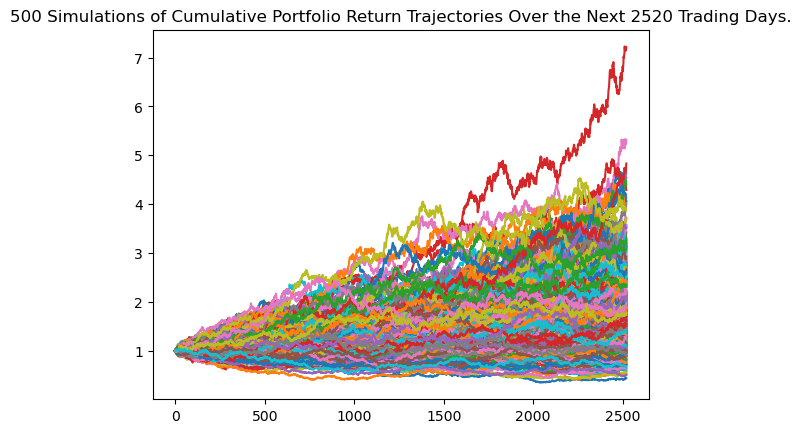

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10_df.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

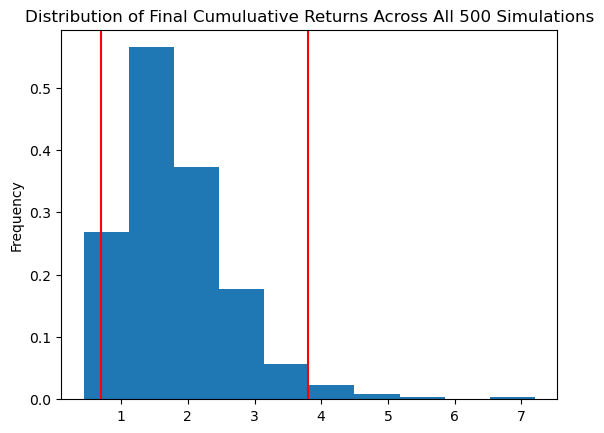

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10_df.plot_distribution()

In [42]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_10_stats = MC_10_df.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_10_stats)

count           500.000000
mean              1.841011
std               0.825812
min               0.441393
25%               1.280105
50%               1.694950
75%               2.265234
max               7.203722
95% CI Lower      0.700786
95% CI Upper      3.803277
Name: 2520, dtype: float64


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\PORTFOLIO_SIM_PROJECT\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [43]:
# Print the current balance of the stock and bond portion of the members portfolio
print(total_stocks_bonds)

70198.9


In [44]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_10_stats[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = MC_10_stats[9] * total_stocks_bonds

# Print the result of your calculations
print(f'With a portfolio valuation of ${total_stocks_bonds:.2f}, and a weighted split of'
      f' 80% for SPY and 20% for AGG, the lower bound projected return for your portfolio is'
      f' ${ci_lower_ten_cumulative_return:.2f}, and the upper bound projected return for your'
      f' portfolio is ${ci_upper_ten_cumulative_return:.2f}.')

With a portfolio valuation of $70198.90, and a weighted split of 80% for SPY and 20% for AGG, the lower bound projected return for your portfolio is $49194.44, and the upper bound projected return for your portfolio is $266985.90.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?